# Objectives

1. Discuss the general supervised ML workflow 
2. Code a classification example on the Penguins dataset

# Warm-up

**Get together in small groups and brainstorm on the machine learning workflow:**

1. What are the steps of a machine learning workflow?

2. In which order should they be followed?


- load data/get data
- prepare data/cleaning data
- dividing data into training, test and validation data
- deploying the machine learning model
- validating the machine learning model
- tuning hyperparameters
- test scoring 
- finding out the business problem
- training a machine learning 
- EDA: expolatory data analysis


# 1. Supervised ML Workflow

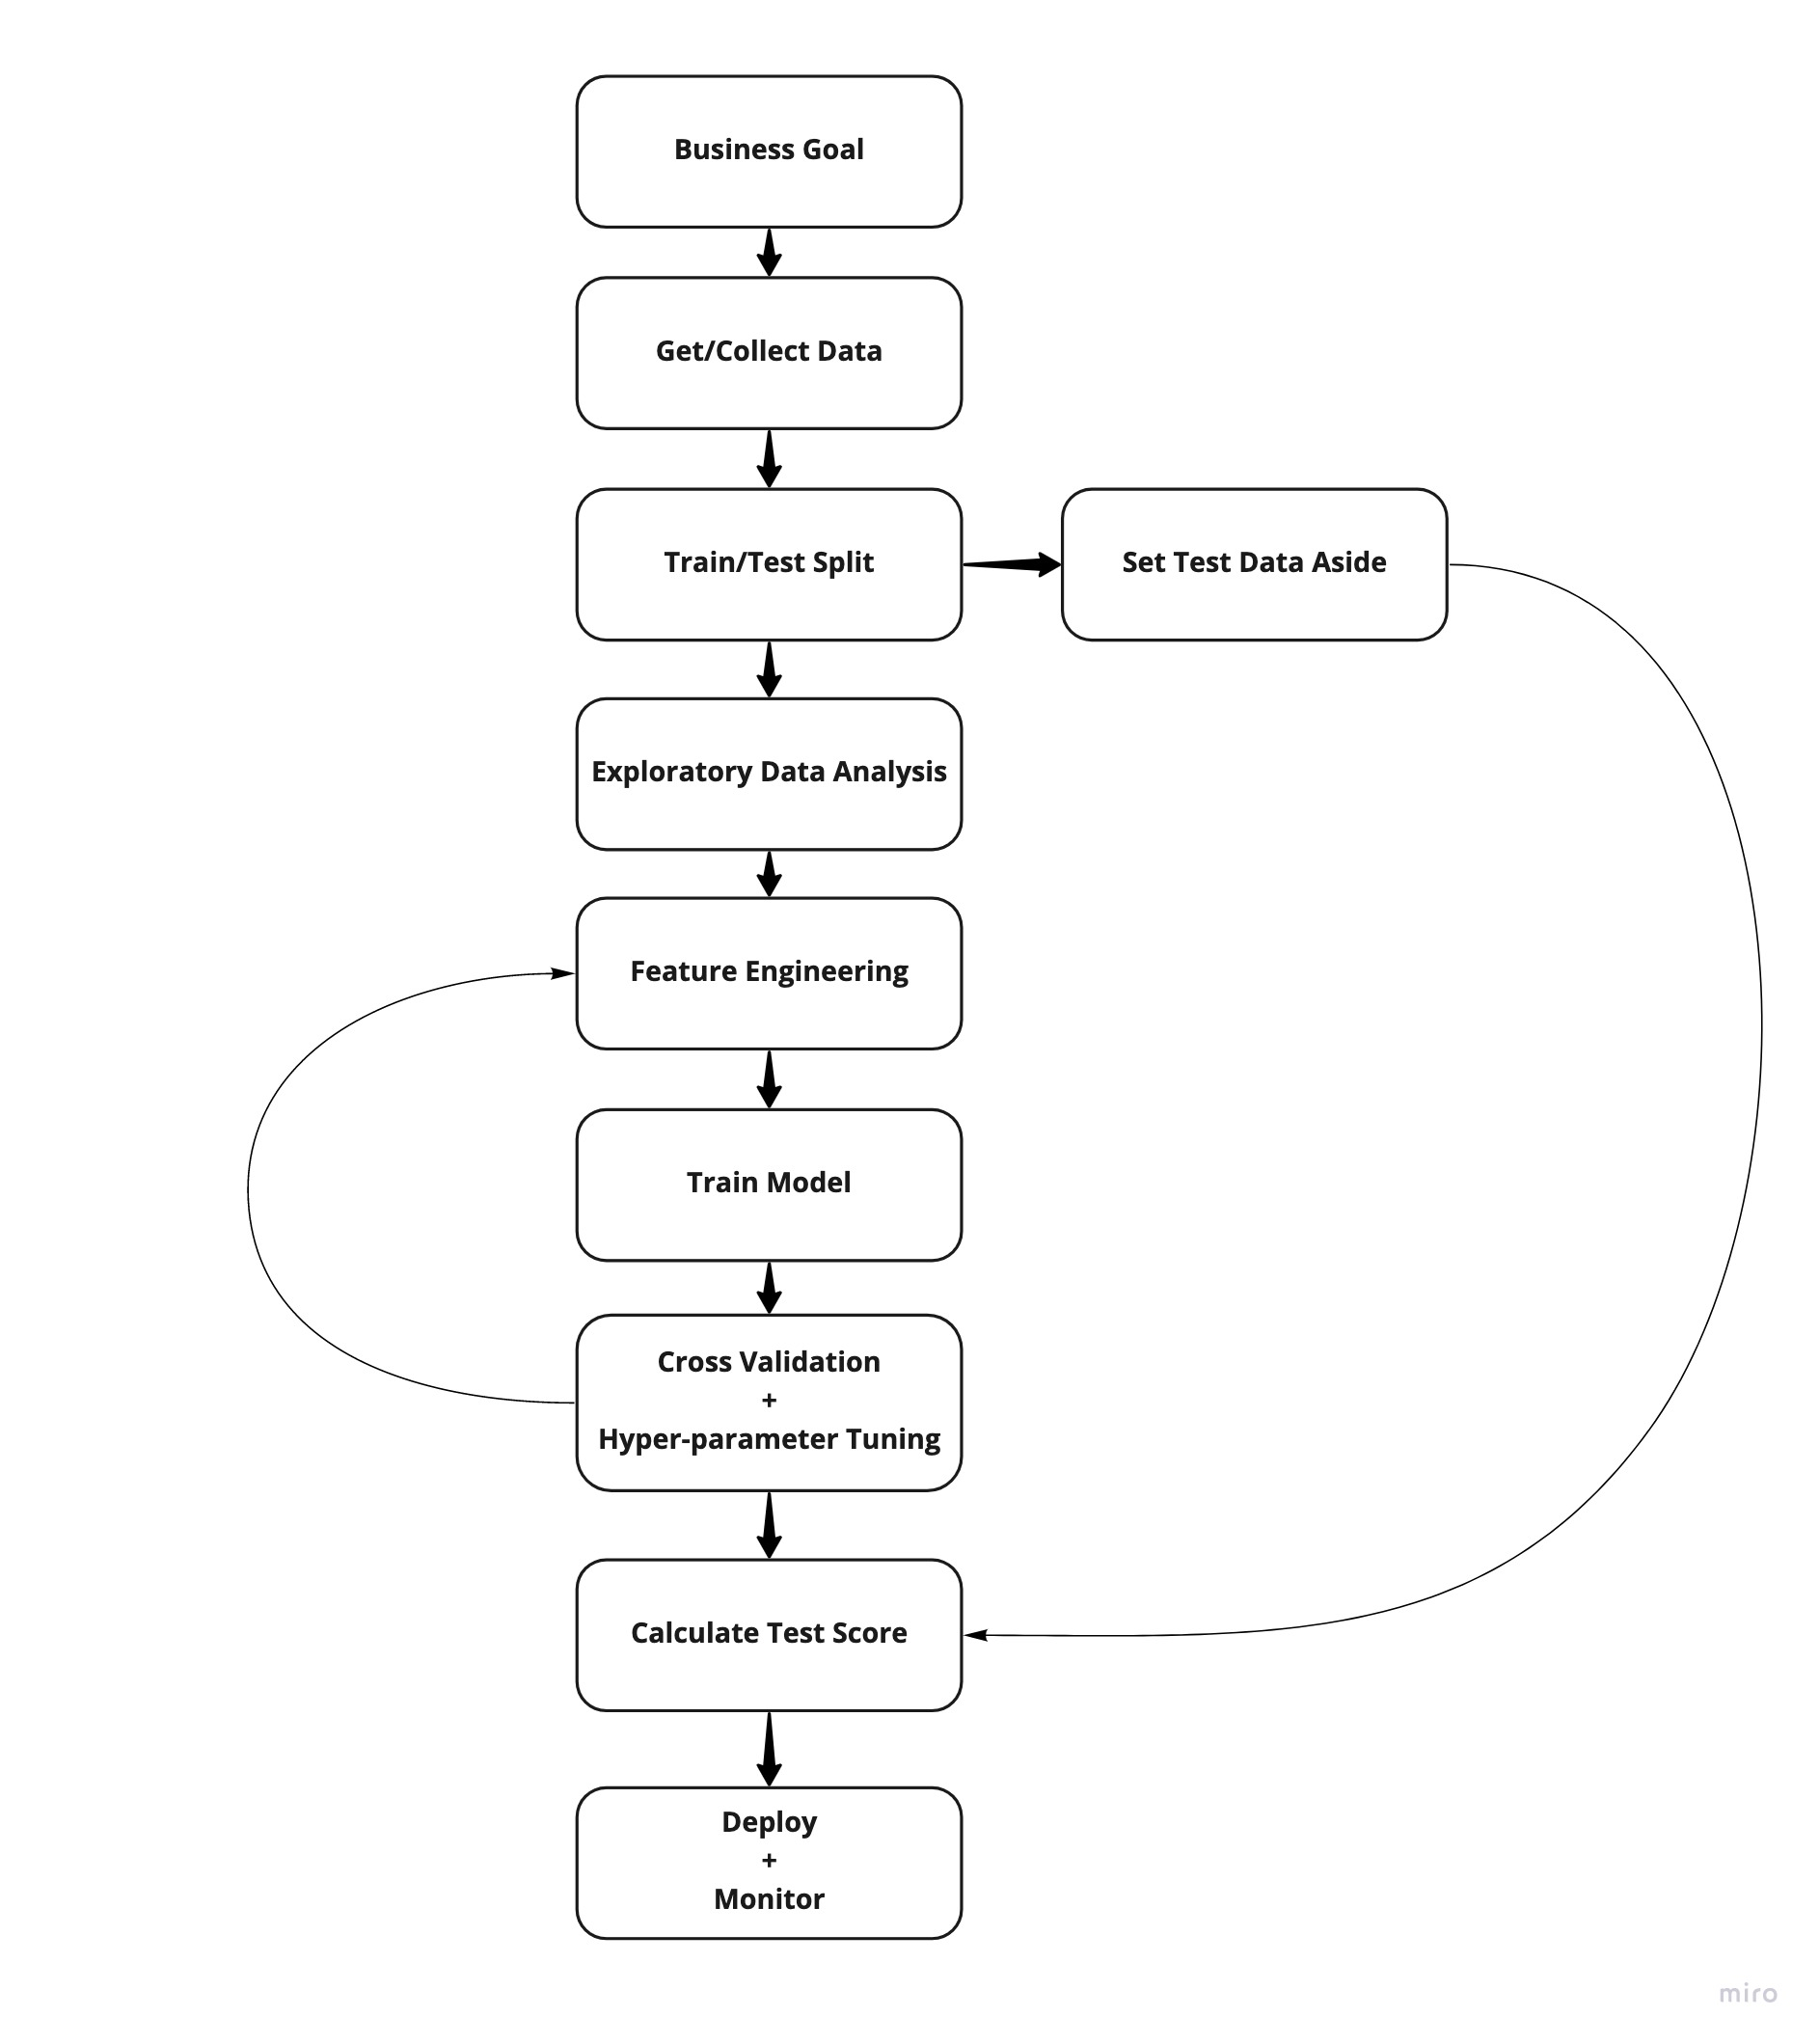

## 1.1 Identify Business Goal

### Examples:


- classifcation of emails into spam and inbox
- predicting commodity prices (e.g. houses)
- detecting fraud in financial transactions
- detecting cancer from medical scans
- ...

### How to choose an ML model based on the business goal ?

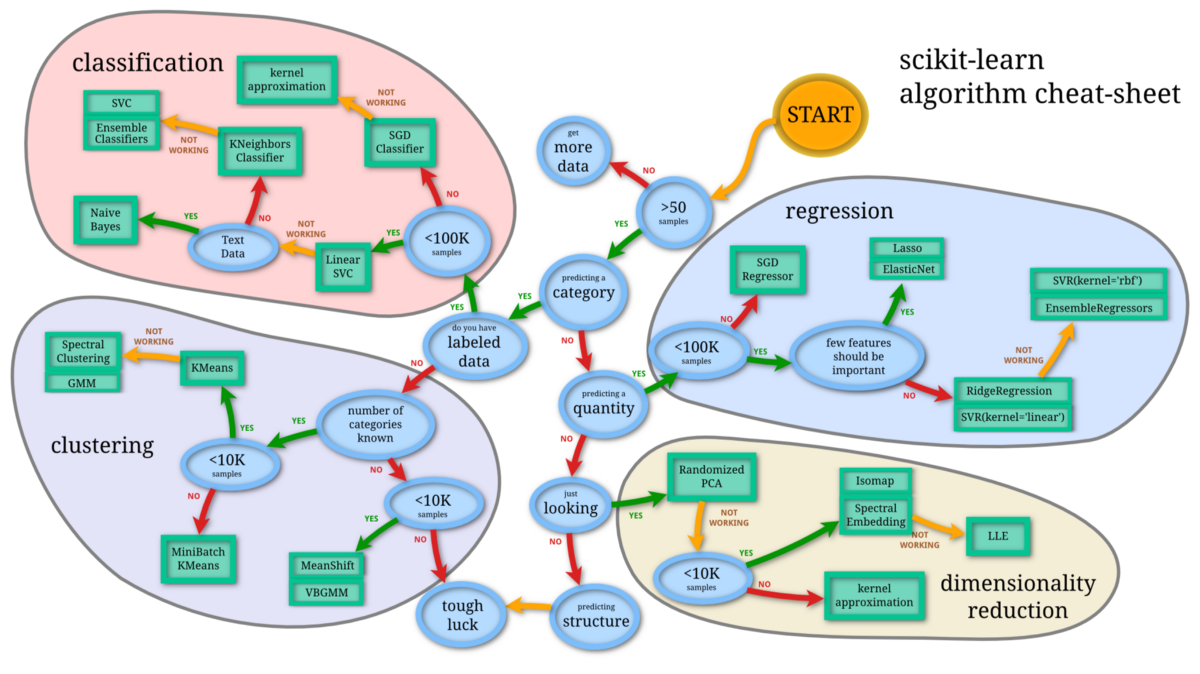

## 1.2 Get Data

### Common Sources of Data for ML:

- from the internet, scraping data
- from a database 
- survey/ manually collect data
- api application programming interface 
- artificially construct data
- research papers, from actual people/test subjects/ from experiments in the lab
- messy google spreadsheets
- sensor data

## 1.3 Split Data into Train and Test Datasets 

### Why do we need the train/test split ?

## 1.4 Exploratory Data Analysis (EDA)

### Important things to check for in EDA (not comprehensive!)

- Missing data
- Unclean data
- Outliers
- Class imbalances
- Correlations between features and output
- ...

## 1.5 Data Prep/Feature Engineering

### Data Prep/Feature Engineering Examples

- Filling in missing data 
- Dropping one or more features
- Encoding non-numeric features
- Normalization
- creating new features from existing ones ===> creating a month, year, day of week features from a date feature
- Feature Expansion by adding higher order terms of existing features
- Transformation of one or more features or output

## 1.6 Model Training

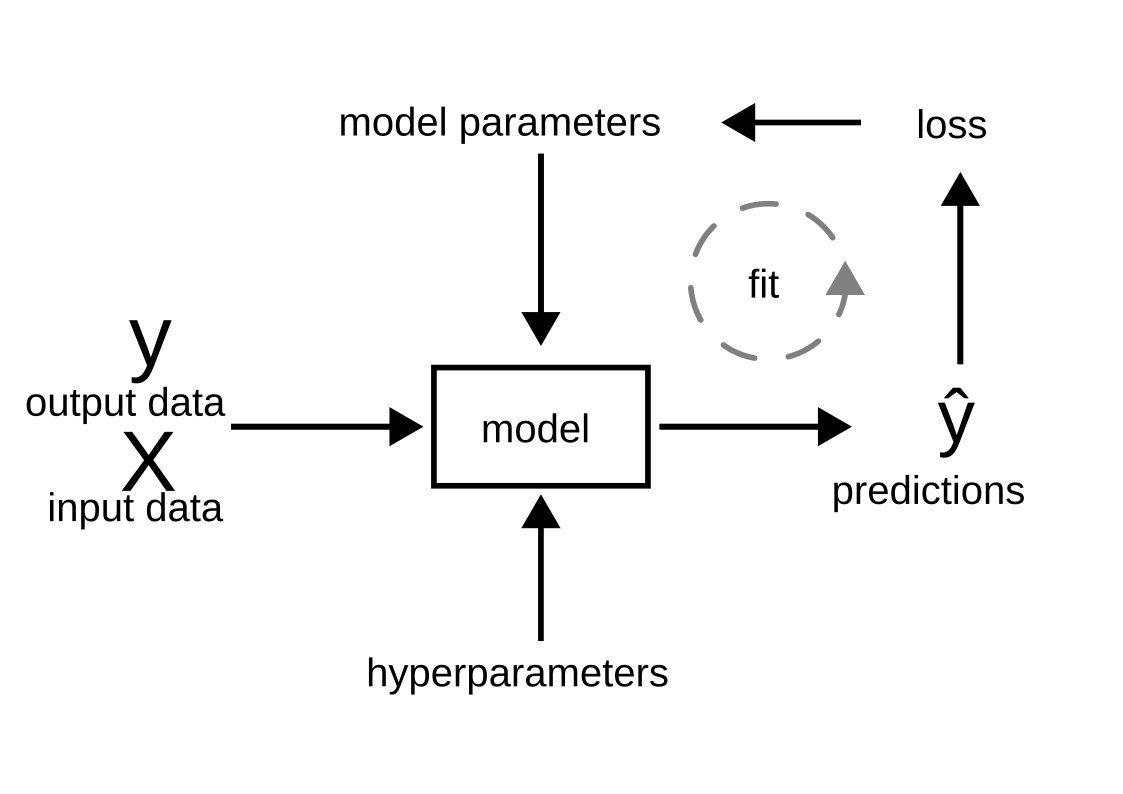

## 1.7 Validation + Hyperparameter Tuning

### What is the difference(s) between a Model Parameter and a Model Hyperparameter ?

### Model Parameters are:

- not manually set by the practitioner
- learned by the model during the training process
- required to make predictions
- stored as part of the learned model (after training)

### Model Hyperparameters are:

- Used to control some aspect of the learning process
- They are often specified by the practitioner
- They are tuned for a given predictive modeling problem

## 1.8 Calculate Test Score

### Why do we need this step ??

### 1.9 Deploy + Monitor Model

### What does Model Deployment mean ?

### Why do we need to monitor a model in production ?

- Evaluation metrics
- Model drift
- Model retraining

# 2. Example on ML Workflow

In [19]:
# imports 

import pandas as pd
import seaborn as sns
from sklearn..... import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 1: Identify Business Goal

Classify penguins species based on their flipper length

### Step 2: Get Data

In [20]:
penguins = pd.read_csv('penguins_clean.csv')

In [21]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [27]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [28]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [30]:
penguins['species'].value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

### Step 3: train/test split

In [23]:
X = penguins[['flipper_length_mm', 'body_mass_g']]   # <=== features/independent variables
y = penguins['species']               # <=== output/target/dependent variable

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
Xtrain.shape, Xtest.shape

((266, 2), (67, 2))

### Steps 4 & 5: EDA and Data Prep/Feature Engineering

In [8]:
# Check if there is any missing data

In [26]:
Xtrain.isna().sum()

flipper_length_mm    0
body_mass_g          0
dtype: int64

### Q: What else can we do here ??

### Step 6: Train Model

In [29]:
model = DummyClassifier(strategy='most_frequent') # <==== instanstiation, model is blank canvas
model.fit(Xtrain, ytrain) # <==== training part 

DummyClassifier(strategy='most_frequent')

### Step 7: Validate + Hyperparameter Tuning

we do not need this for this very simple example, but we will return to this step in details Thursday and then again next week

### Step 8: Test Scoring

In [18]:
train_score = model.score(Xtrain, ytrain)
print(f"training score: {train_score:5.3f}")  # rounding floats is a good practise

test_score = model.score(Xtest, ytest)
print(f"test score: {test_score:5.3f}")  

training score: 0.440
test score: 0.433


In [41]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


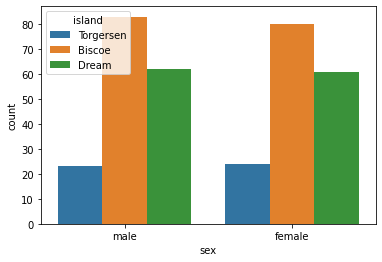

In [51]:
sns.countplot(data=penguins, x='sex', hue='island');

<AxesSubplot:xlabel='sex,island'>

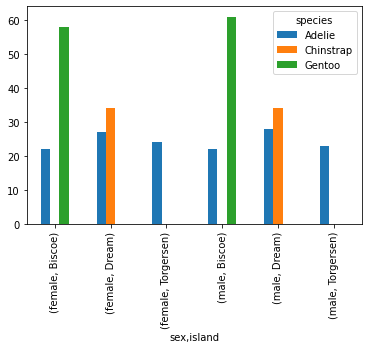

In [57]:
penguins.groupby(['sex', 'island', 'species']).size().unstack().plot(kind='bar')

AttributeError: 'Rectangle' object has no property 'normalize'

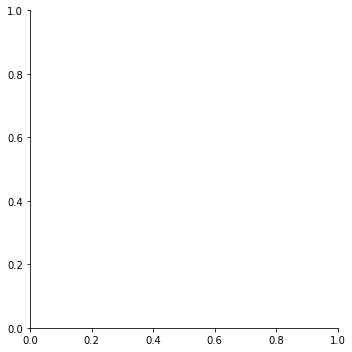

In [59]:
sns.catplot(data=penguins, kind='count', x='species')

In [61]:
penguins_female = penguins.loc[penguins['sex']=='female']

In [62]:
penguins_female

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
...,...,...,...,...,...,...,...
324,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female
326,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female
327,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female


In [63]:
penguins_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 1 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            165 non-null    object 
 1   island             165 non-null    object 
 2   bill_length_mm     165 non-null    float64
 3   bill_depth_mm      165 non-null    float64
 4   flipper_length_mm  165 non-null    float64
 5   body_mass_g        165 non-null    float64
 6   sex                165 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.3+ KB


In [64]:
penguins_female['island'].value_counts()

Biscoe       80
Dream        61
Torgersen    24
Name: island, dtype: int64

<AxesSubplot:xlabel='island', ylabel='count'>

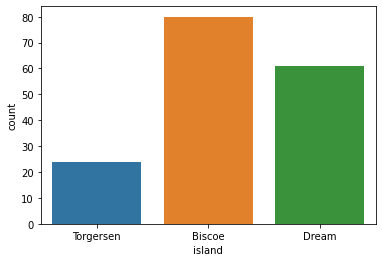

In [65]:
sns.countplot(data=penguins_female, x='island')